In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import nltk #For POS tagging
import sklearn #For generating some matrices
import pandas as pd#For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #MAkes the plots look nice

import pickle #if you want to save layouts
import os

%matplotlib inline

D:\computation\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


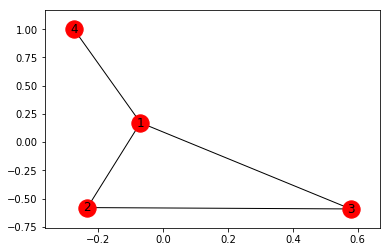

In [2]:
g = nx.Graph()

g.add_node(1)
g.add_node(2)
g.add_node(3)

g.add_edges_from([(1, 2), (2, 3), (3, 1), (1,4)])


g.edges[1, 2]['weight'] = 2
g.edges[1, 4]['weight'] = 2
g.edges[1, 4]

nx.draw_networkx(g)


In [3]:
import pandas
powMIA = pandas.read_csv('D:/contentAnalysis/content-analysis-2018/data/powMIA.csv')

In [4]:
powMIA

,article,date,cluster
0,"Neil Sheehan interview with Tran Ngoc Chau,...",January 14 1980,0
1,Bill Kurtis article on plight of half-Ameri...,March 2 1980,0
2,Pakistan plans to close its embassy in Hano...,April 12 1980,0
3,Pakistan plans to close its embassy in Hano...,April 12 1980,0
4,"South Korean diplomats Rhee Dai Young, mini...",April 14 1980,0
5,"Vietnamese officials, who have established ...",April 14 1980,1
6,"Vietnamese officials, who have established ...",April 14 1980,1
7,South Korean Information Minister Lee Kyoo ...,April 20 1980,0
8,To the Editor: Since the fall of South Vi...,June 21 1980,0
9,WORLD NEWS BRIEFS; Racial Unrest to Be Cru...,June 23 1980,0


In [5]:
powMIA['tokenized_sents'] = powMIA['article'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
powMIA['normalized_sents'] = powMIA['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = None, stemmer = lucem_illud.stemmer_basic) for s in x])

In [34]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [35]:
g = wordCooccurrence(powMIA['normalized_sents'].sum())

In [36]:
len(g.nodes)

8794

In [37]:
len(g.edges)

722169

In [38]:
def tokenize(text):
    tokenlist = nltk.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist, stopwordLst = lucem_illud.stop_words_basic) #, stemmer = lucem_illud.stemmer_basic)
    return normalized

In [39]:
powVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)

# let's see what happens when I take the range [:10] our of vects_incidence
# this is apparently a bad idea...

powVects_incidence = powVectorizer.fit_transform(powMIA['article'])

In [40]:
powVects_incidence.shape

(393, 13558)

In [41]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((powVectorizer.get_feature_names()[i] for i in range(powVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(powVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, powVectorizer.get_feature_names()[w], {'weight' : powVects_incidence[d, w]}) for d, w in zip(*powVects_incidence.nonzero())))

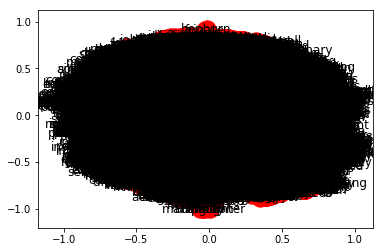

In [43]:
# crazy big
nx.draw_networkx(g_2mode)

In [44]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [45]:
gDoc = contractNetwork(g_2mode, 'doc')

In [46]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 393
Number of edges: 77028
Average degree: 392.0000


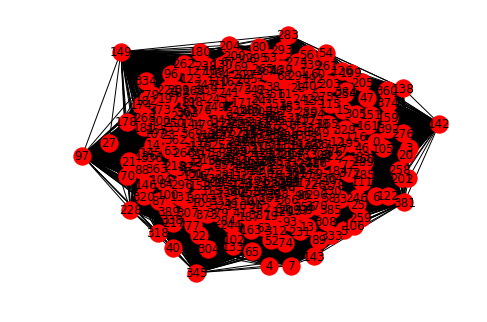

In [47]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

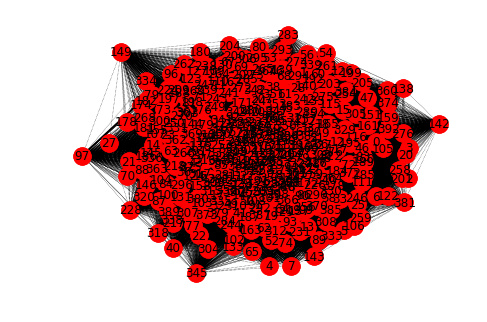

In [48]:

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [49]:
print(powMIA.iloc[0]['article'].strip().replace('  ', '\n'))


Neil Sheehan interview with Tran Ngoc Chau, former South Vietnamese Army officer and Government official, who underwent 're-education training' by Communist Vietnamese officials after war's end.
Chau, who is refugee living in Van Nuys, Calif, says Hanoi leadership undertook unprecedented experiment to convert and reconcile former opponents instead of killing them.
Notes there were some trials and long prison terms, but he does not know of anyone from South Vietnam was was executed for acts committed during war.
Says tens of thousands, possibly more than 100,000, remain confined because authorities are still afraid or unwilling to release them.
Describes life in re-education camp.
Notes hundreds of thousands who have been released are untrusted minority of 2d-class citizens.
Notes Government effort to repopulate ricelands, so-called New Economic Zones, is failing because authorities do not have enough seed rice, tools and other essentials to help settlers.
Notes his view of Vietnamese C

In [50]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 13558
Number of edges: 10241054
Average degree: 1510.7028


In [51]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.8963303972423151

In [52]:
gWord.remove_edges_from([(n1, n2) for n1, n2, d in gWord.edges(data = True) if d['weight'] <= 1])
gWord.remove_nodes_from(list(nx.isolates(gWord))) #since we are changing the graph list() evuluates the isolates first
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 7809
Number of edges: 4300841
Average degree: 1101.5088


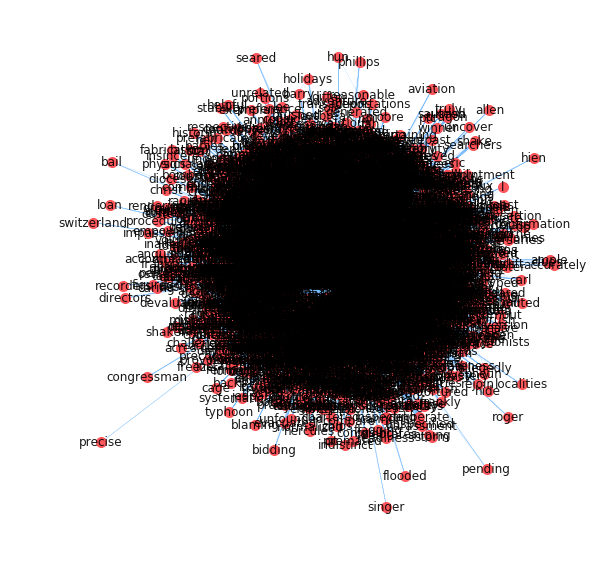

In [53]:
layout = nx.spring_layout(gWord, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gWord, ax = ax, pos = layout, labels = {n:n for n in gWord.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [66]:
minWeight = 75
gWord.remove_edges_from([(n1, n2) for n1, n2, d in gWord.edges(data = True) if d['weight'] <= minWeight])
gWord.remove_nodes_from(list(nx.isolates(gWord))) #since we are changing the graph list() evuluates the isolates first
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 111
Number of edges: 1101
Average degree:  19.8378


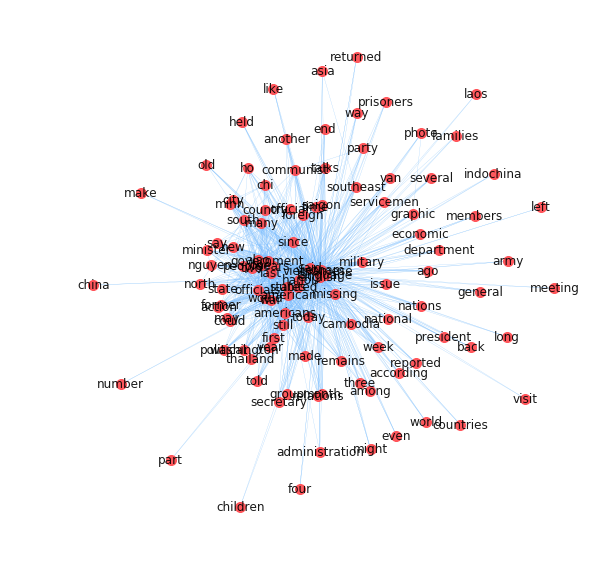

In [67]:
layout = nx.spring_layout(gWord, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gWord, ax = ax, pos = layout, labels = {n:n for n in gWord.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying